# Traffic Sign Recognition - Deep Learning Multiclassifier

# Goal

The primary objective of this Jupyter Notebook is to build a robust traffic sign recognition system using deep learning techniques. I will leverage TensorFlow and Keras, two powerful libraries for deep learning, to construct a deep neural network known as LeNet. The ultimate goal is to accurately classify various traffic signs.

# Dataset 

The dataset comprises 43 classes, each representing a specific type of traffic sign. The dataset contains traffic sign images, which we will use to train the LeNet model.

# Approach - LeNet Architecture

My approach revolves around the LeNet architecture, a well-known deep network suitable for image classification tasks. The LeNet model consists of convolutional and pooling layers, followed by fully connected layers. These layers work in tandem to extract features from the traffic sign images and make predictions.

# Phases of the Project

- Data Collection and Preprocessing: I will begin by collecting and preprocessing the traffic sign images. Proper preprocessing ensures that the data is appropriately formatted and ready for training the model.

- Model Construction - LeNet Architecture: I will implement the LeNet model using TensorFlow and Keras. The model will be designed to learn from the input traffic sign images and predict their corresponding classes.

- Model Training: The LeNet model will be trained using the training set of traffic sign images. During training, the model will learn to recognize the distinctive features of each traffic sign class.

- Model Evaluation: Once trained, I will evaluate the model's performance using the test set of traffic sign images. The evaluation metrics will provide insights into the model's accuracy and effectiveness in classifying traffic signs.

- Prediction: With the trained and evaluated model, we can use it to predict the classes of new, unseen traffic sign images, thereby facilitating real-world applications.

## TensorFlow and Keras

TensorFlow and Keras are essential components of this project, enabling us to build, train, and evaluate the LeNet model efficiently. TensorFlow provides the underlying framework for building deep learning models, while Keras offers a high-level API for constructing and training neural networks.

## Conclusion

By utilizing TensorFlow and Keras and implementing the LeNet architecture, I aim to develop a powerful traffic sign recognition system capable of accurately classifying various traffic signs. The application of deep learning in this context has significant implications for enhancing road safety, autonomous vehicles, and intelligent traffic management. Through this project, I showcase the potential of cutting-edge deep learning techniques in solving real-world challenges and paving the way for safer and more efficient transportation systems.



- **Data Source** - https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

# GET THE DATA AND VISUALIZE IT 

In [4]:
import pickle

with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [5]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [6]:
X_test.shape

(12630, 32, 32, 3)

label =  35


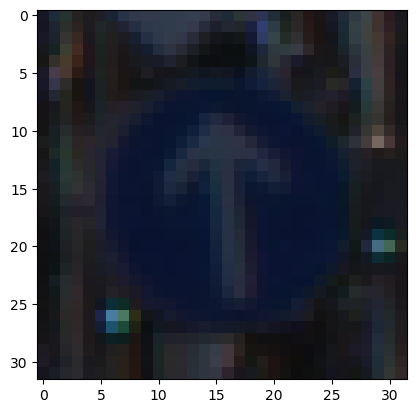

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
i = np.random.randint(1, len(X_test))
plt.imshow(X_test[i])
print('label = ', y_test[i])

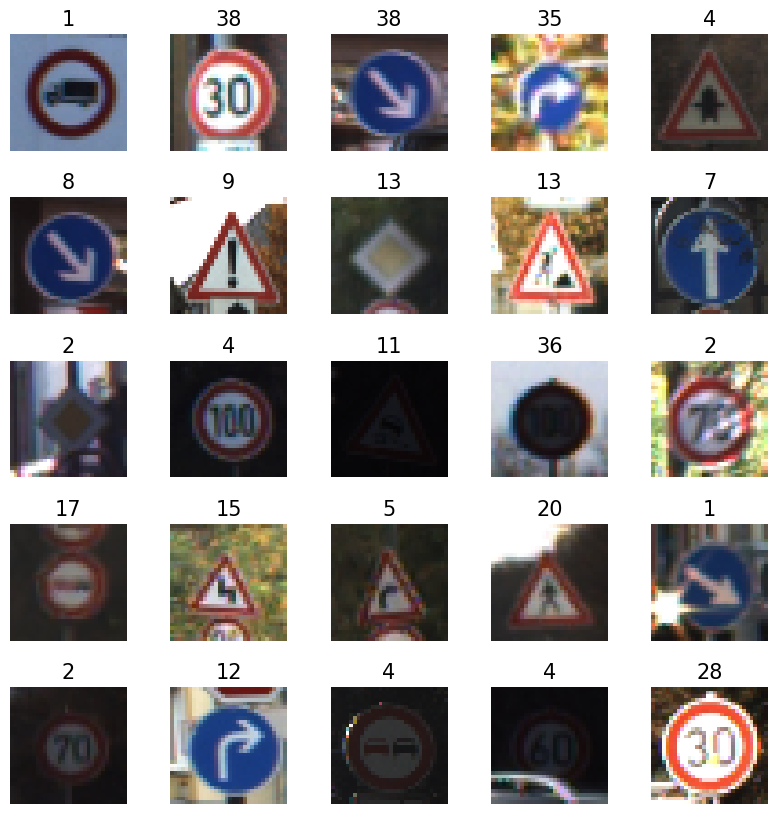

In [15]:
# define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
# flaten the 5 x 5 matrix into 25 array
axes = axes.ravel() 
# get the length of the training dataset
n= len(X_test) 

# select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid):
    # create evenly spaces variables 
    index=np.random.randint(0,n)
    axes[i].imshow(X_test[i])
    axes[i].set_title(y_test[index],fontsize=15)
    axes[i].axis("off")
plt.subplots_adjust(hspace=.4)


# IMPORT SAGEMAKER/BOTO3, CREATE A SESSION, DEFINE S3 AND ROLE 

In [31]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2

import sagemaker
import boto3

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()

# Let's define the S3 bucket and prefix that we want to use in this session
bucket = 'traffic-classification-efth' # bucket named 'sagemaker-practical' was created beforehand
prefix = 'traffic-sign-classifier' # prefix is the subfolder within the bucket.

# Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::787144017525:role/service-role/AmazonSageMaker-ExecutionRole-20230722T094075


# UPLOAD THE DATA TO S3

In [32]:
# create directory to store the training and validation data

import os
os.makedirs("./data", exist_ok = True)


In [33]:
# Save several arrays into a single file in uncompressed .npz format
# Read more here: https://numpy.org/devdocs/reference/generated/numpy.savez.html

np.savez('./data/training', image = X_train, label = y_train)
np.savez('./data/validation', image = X_test, label = y_test)

In [34]:
# ppload the training and validation data to S3 bucket

prefix = 'traffic-sign'

training_input_path   = sagemaker_session.upload_data('data/training.npz', key_prefix = prefix + '/training')
validation_input_path = sagemaker_session.upload_data('data/validation.npz', key_prefix = prefix + '/validation')

print(training_input_path)
print(validation_input_path)

s3://sagemaker-us-east-1-787144017525/traffic-sign/training/training.npz
s3://sagemaker-us-east-1-787144017525/traffic-sign/validation/validation.npz


# TRAIN THE CNN LENET MODEL USING SAGEMAKER

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1


    - Input = 32x32x3
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2


    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK


    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER


    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER


    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER


    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [36]:
!pygmentize train-cnn.py

import argparse, os
import numpy as np
import tensorflow
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import multi_gpu_model


# The training code will be contained in a main gaurd (if __name__ == '__main__') so SageMaker will execute the code found in the main. 
# argparse: 
if __name__ == '__main__':
    
    # Parser to get the arguments
    parser = argparse.ArgumentParser()

    # Model hyperparameters are being sent as command-line arguments.
    parser.add_argument('--epochs', type=int, default=1)
    parser.add_argument('--learning-rate', type=float, default=0.001)
    parser.add_argument('--batch-size', type=int, default=32)
    
    
    
    # The script receives environment variables in the training container instance. 
    # SM_

In [37]:
from sagemaker.tensorflow import TensorFlow

# To Train a TensorFlow model, we will use TensorFlow estimator from the Sagemaker SDK

# entry_point: a script that will run in a container. This script will include model description and training. 
# role: a role that's obtained The role assigned to the running notebook. 
# train_instance_count: number of container instances used to train the model.
# train_instance_type: instance type!
# framwork_version: version of Tensorflow
# py_version: Python version.
# script_mode: allows for running script in the container. 
# hyperparameters: indicate the hyperparameters for the training job such as epochs and learning rate


tf_estimator = TensorFlow(entry_point='train-cnn.py', 
                          role=role,
                          train_instance_count=1, 
                          train_instance_type='ml.c4.2xlarge',
                          framework_version='1.12', 
                          py_version='py3',
                          script_mode=True,
                          hyperparameters={
                              'epochs': 2 ,
                              'batch-size': 32,
                              'learning-rate': 0.001}
                         )

train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [38]:
tf_estimator.fit({'training': training_input_path, 'validation': validation_input_path})

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: sagemaker-tensorflow-scriptmode-2023-07-31-21-33-34-249


Using provided s3_resource
2023-07-31 21:33:34 Starting - Starting the training job...
2023-07-31 21:33:58 Starting - Preparing the instances for training......
2023-07-31 21:35:00 Downloading - Downloading input data...
2023-07-31 21:35:26 Training - Training image download completed. Training in progress..2023-07-31 21:35:31,310 sagemaker-containers INFO     Imported framework sagemaker_tensorflow_container.training
2023-07-31 21:35:31,316 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2023-07-31 21:35:31,531 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2023-07-31 21:35:31,546 sagemaker-containers INFO     No GPUs detected (normal if no gpus installed)
2023-07-31 21:35:31,557 sagemaker-containers INFO     Invoking user script
Training Env:
{
    "additional_framework_parameters": {},
    "channel_input_dirs": {
        "training": "/opt/ml/input/data/training",
        "validation": "/opt/ml/input/data/validation"
    },
 

# DEPLOY THE MODEL WITHOUT ACCELERATORS

In [39]:
# deploying the model

import time

tf_endpoint_name = 'trafficsignclassifier-' + time.strftime("%Y-%m-%d-%H-%M-%S", time.gmtime())

tf_predictor = tf_estimator.deploy(initial_instance_count = 1,
                         instance_type = 'ml.t2.medium',  
                         endpoint_name = tf_endpoint_name)     

INFO:sagemaker.tensorflow.model:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating model with name: sagemaker-tensorflow-scriptmode-2023-07-31-21-39-00-811
INFO:sagemaker:Creating endpoint-config with name trafficsignclassifier-2023-07-31-21-39-00
INFO:sagemaker:Creating endpoint with name trafficsignclassifier-2023-07-31-21-39-00


------------!

Predicted labels are: [26  8 38  8 25]


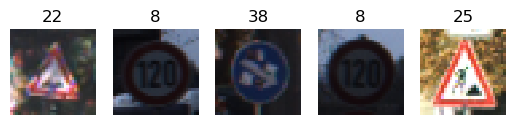

In [40]:
# making predictions from the end point


%matplotlib inline
import random
import matplotlib.pyplot as plt

# pre-processing the images

num_samples = 5
indices = random.sample(range(X_test.shape[0] - 1), num_samples)
images = X_test[indices]/255
labels = y_test[indices]

for i in range(num_samples):
    plt.subplot(1,num_samples,i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')

# making predictions 

prediction = tf_predictor.predict(images.reshape(num_samples, 32, 32, 3))['predictions']
prediction = np.array(prediction)
predicted_label = prediction.argmax(axis=1)
print('Predicted labels are: {}'.format(predicted_label))

In [41]:
# deleting the end-point
tf_predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: trafficsignclassifier-2023-07-31-21-39-00
INFO:sagemaker:Deleting endpoint with name: trafficsignclassifier-2023-07-31-21-39-00


# Conclusion

## 1) Empowering Safer and Efficient Transportation Systems with Deep Learning

The primary objective of this project was to develop a powerful traffic sign recognition system by harnessing the capabilities of TensorFlow and Keras and implementing the LeNet architecture. The application of deep learning in this context has immense implications for enhancing road safety, facilitating autonomous vehicles, and enabling intelligent traffic management. Through this project, I have showcased the potential of cutting-edge deep learning techniques in addressing real-world challenges and paving the way for safer and more efficient transportation systems.

Traffic sign recognition plays a pivotal role in modern road safety and traffic management. Accurate and timely recognition of traffic signs is crucial for various applications, including improving the safety of autonomous vehicles, enhancing driver assistance systems, and optimizing traffic flow in smart cities. The successful development of a robust traffic sign recognition system demonstrates the power of deep learning in addressing complex computer vision tasks and advancing the field of transportation.

## 2) Training the CNN LeNet Model using Amazon SageMaker

In pursuit of this goal, I employed Amazon SageMaker, a comprehensive cloud-based machine learning platform, to train the LeNet model at scale. SageMaker's capabilities enabled me to efficiently train the deep neural network on a large dataset, leveraging the elasticity and computational resources of the cloud. This significantly reduced the training time and facilitated the optimization of the model's performance.

Creating a train-cnn.py file allowed me to construct the LeNet model framework, and I used SageMaker to train the CNN on the traffic sign dataset. The end result metrics showcased the model's effectiveness, with a validation loss of 0.7172 and a validation accuracy of 0.8400. These metrics indicate the model's ability to generalize well to unseen data, a crucial aspect for real-world applications.

## 3) Paving the Way for Safer Roads and Intelligent Transportation

The successful development and training of the LeNet model for traffic sign recognition illustrate the potential of deep learning techniques in revolutionizing transportation systems. The accuracy achieved by the model on the validation set demonstrates its capability to identify and classify various traffic signs with high precision, which can be vital in critical scenarios.

Moreover, the application of deep learning in the transportation domain opens up possibilities for enhanced road safety, reduced accidents, and improved traffic management. The integration of such advanced technologies can lead to the development of more reliable and efficient autonomous vehicles, contributing to the realization of a safer and more sustainable transportation ecosystem.

In conclusion, this project exemplifies the power of deep learning and the LeNet architecture implemented with TensorFlow and Keras in solving real-world challenges related to traffic sign recognition. By leveraging Amazon SageMaker for scalable training, I have demonstrated the effectiveness of cloud-based machine learning solutions. The results obtained through this project underscore the transformative potential of cutting-edge deep learning techniques in shaping the future of transportation systems and road safety.
